# 📊 Análisis exploratorio: 🏦 Bank Marketing Dataset (UCI)

## 1️⃣ **Introducción y contexto del proyecto**

El análisis exploratorio que se va a realizar está basado en el dataset **Bank Marketing**, publicado por el Banco de Portugal y disponible en el repositorio UCI Machine Learning:  
🔗 https://archive.ics.uci.edu/dataset/222/bank+marketing  

Este conjunto de datos recoge información de campañas de marketing telefónico realizadas por una entidad bancaria portuguesa. El banco contactaba a clientes potenciales con el fin de ofrecerles un depósito a plazo fijo. Cada fila representa a un cliente contactado y las variables recogen aspectos demográficos, financieros y operativos del proceso de captación. Los datos recogidos en este dataset están ordenadores por fecha, desde Mayo del 2008 a Noviembre del 2010.

El fichero que analizaremos, **bank-full.csv**, contiene **45.211 registros** y **17 variables** relacionadas con datos demográficos, laborales, financieros y características de la interacción comercial.

Aunque el objetivo original del dataset era predecir si un cliente contrataría un depósito a plazo fijo, en este proyecto vamos a reutilizar estas variables para analizar y modelar dos grandes escenarios reales dentro del sector financiero: **gestión de patrimonio** y **gestión del riesgo**.

---

## 🎯 **Objetivo del análisis**

El propósito de este análisis es **comprender el perfil financiero y sociodemográfico de los clientes del banco**, analizando sus patrones económicos y su posible estabilidad o capacidad de ahorro.

Para ello, exploraremos en profundidad la columna `balance`, que refleja el **saldo anual promedio de la cuenta bancaria del cliente**. A partir de esta métrica construiremos **dos posibles variables objetivo (targets)**, inspiradas en escenarios reales del sector bancario:

---


## 🅰️ **Escenario A: El Umbral del 90% — Gestión de Patrimonio**

En banca privada existe un fenómeno conocido: **el 10% de los clientes más ricos generan alrededor del 80% de los ingresos del banco** (Principio de Pareto). Identificar este grupo es clave para priorizar servicios personalizados y productos de alto valor.

**Acción realista:**  
Calcular el **percentil 90 (P90)** del `balance`. Ese valor representa el **mínimo saldo que posee el 10% de clientes más adinerados**.

A partir de ese umbral crearemos la variable binaria `Patrimonio_Alto`:

- `Patrimonio_Alto = 1` si `balance > P90`  
- `Patrimonio_Alto = 0` si `balance ≤ P90`

**Interpretación práctica:**  
El modelo resultante permitirá estimar si un cliente **pertenece al segmento de alto patrimonio**, a partir de su edad, trabajo, educación, historial crediticio y comportamiento financiero.  
Esto imita cómo las divisiones de **Wealth Management** detectan clientes con potencial para productos premium.

---

## 🅱️ **Escenario B: El Umbral Cero — Riesgo y Sobregiro**

En gestión de riesgos bancarios, uno de los indicadores más críticos es detectar **clientes con saldo negativo** o riesgo de entrar en sobregiro. Un balance por debajo de cero señala inestabilidad financiera o dependencia del crédito.

**Acción realista:**  
Utilizar el valor **0 como umbral**.

Crearemos la variable binaria `Riesgo_Sobregiro`:

- `Riesgo_Sobregiro = 1` si `balance < 0`  
- `Riesgo_Sobregiro = 0` si `balance ≥ 0`

**Interpretación práctica:**  
El modelo predecirá qué clientes tienen una **alta probabilidad de estar en números rojos**, lo que resulta esencial para los departamentos de **Risk Management**.  
Esto ayuda a anticipar comportamientos financieros que puedan derivar en impagos o necesidad de intervención.

---

## 🧩 **Significado de las variables del dataset**

| **Columna** | **Descripción** |
|-------------|-----------------|
| `age` | Edad del cliente. |
| `job` | Tipo de trabajo u ocupación. |
| `marital` | Estado civil. |
| `education` | Nivel de educación alcanzado. |
| `default` | ¿Tiene impagos en créditos anteriores? |
| `balance` | Saldo medio anual de la cuenta bancaria. |
| `housing` | ¿Tiene hipoteca en curso? (yes/no) |
| `loan` | ¿Tiene algún préstamo personal? |
| `contact` | Tipo de contacto empleado (teléfono móvil o fijo). |
| `day` | Día del mes en que se realizó el último contacto. |
| `month` | Mes del último contacto. |
| `duration` | Duración (en segundos) de la última llamada. |
| `campaign` | Número de contactos realizados durante la campaña. |
| `pdays` | Días desde el último contacto previo a esta campaña. |
| `previous` | Número de contactos en campañas anteriores. |
| `poutcome` | Resultado de campañas anteriores. |
| `y` | Variable original del banco: ¿suscribió el depósito a plazo? (yes/no). |

---

📌 *Fuente de los datos: UCI Machine Learning Repository, Bank Marketing Dataset (2012).*  

Este análisis nos permitirá comprender mejor los perfiles financieros de los clientes y construir modelos predictivos aplicables a contextos reales de banca, tanto en **gestión de patrimonio** como en **evaluación de riesgo**.

---

## 2️⃣ **Importación de librerías y carga del dataset**

Incluye todas las librerías necesarias para manipular datos, visualizar resultados y entrenar modelos.  
Se carga también el fichero `bank-full.csv` y se muestran sus primeras filas para verificar que se ha importado correctamente.

In [38]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np
import io # Agregamos io para el manejo de strings como archivos

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelos (scikit-learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos que usaremos más adelante
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Cargamos el dataset y visualizamos las primeras filas

In [39]:
dataset = './data/bank-full.csv'

# 1. Leer el archivo completo como texto
try:
    with open(dataset, 'r', encoding='utf-8') as f:
        content = f.read()
except FileNotFoundError:
    # Manejo de error si el archivo no está en la ubicación esperada
    print(f"Error: No se encontró el archivo '{dataset}'. Asegúrate de que está cargado correctamente.")
    exit()

# 2. Modificación solicitada: Reemplazar todas las comillas dobles (") con una cadena vacía
# Esto limpia tanto el encabezado como el resto de los datos.
cleaned_content = content.replace('"', '')

# 3. Leer el DataFrame usando io.StringIO
# io.StringIO permite a Pandas leer la cadena de texto como si fuera un archivo.
df = pd.read_csv(io.StringIO(cleaned_content), sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


---

## 3️⃣ **Exploración inicial del dataset (EDA básico)**

Este apartado da las primeras pistas sobre posibles problemas o particularidades del dataset.

- .info(), .describe(), .nunique()
- Dimensiones, tipos de datos, distribución inicial.

In [40]:
# Dimensiones del dataset
df.shape

(45211, 17)

In [41]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [42]:
# Estadísticas generales
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [43]:
# Número de valores únicos por columna
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [44]:
# Revisamos la distribución inicial de la variable objetivo para saber si el dataset está desbalanceado
df['balance'].value_counts()

balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64

---

## 4️⃣ **Limpieza de datos**
En esta parte se revisa y corrige la calidad de los datos:
- Detección de valores nulos  
- Comprobación de categorías inconsistentes  
- Revisión de posibles valores atípicos extremos que distorsionen el análisis  
El propósito es garantizar que el dataset sea adecuado para construir modelos fiables.

In [45]:
# Revisamos los valores nulos que pueda tener el dataset
print("\n--- VALORES NULOS ---")
df.isnull().sum()


--- VALORES NULOS ---


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [46]:
print("\n--- VALORES DUPLICADOS ---")
print(df.duplicated().sum())


--- VALORES DUPLICADOS ---
0


In [47]:
# CAMBIAMOS EL NOMBRE A LA VARIABLE 'y' QUE ERA LA VARIABLE OBJETIVO ORIGINAL DEL DATASET
# Definimos el cambio de nombre
rename_map = {
    'y': 'subscribed_term_deposit'
}

# Aplicamos el cambio de nombre
df = df.rename(columns=rename_map)

# Mostramos las primeras filas y los nombres de las columnas para verificar
print("Nombres de columnas después de renombrar:")
print(df.columns.tolist())

Nombres de columnas después de renombrar:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'subscribed_term_deposit']


---

## 5️⃣ **Análisis profundo del balance (variable clave del proyecto)**
La columna `balance` es el pilar de las dos variables objetivo.  
En este apartado se debe:
- Analizar la distribución del balance  
- Identificar valores negativos, picos extraños o colas largas  
- Calcular rangos, percentiles clave (P50, P75, P90, P95)  
- Visualizarlo con histogramas, boxplots o KDE  
Este análisis justifica los umbrales propuestos para los dos escenarios financieros.

### 5.1. Revisión inicial y distribución general

In [48]:
# Primero verificamos el tipo de la columna 'balance' y visualizamos los primeros valores
print("---------- TIPO DE LA COLUMNA BALANCE ----------")
print(df['balance'].dtype)

---------- TIPO DE LA COLUMNA BALANCE ----------
int64


In [49]:
print("---------- MOSTRAMOS LAS 5 PRIMERAS FILAS DE LA COLUMNA BALANCE ----------")
df['balance'].head()

---------- MOSTRAMOS LAS 5 PRIMERAS FILAS DE LA COLUMNA BALANCE ----------


0    2143
1      29
2       2
3    1506
4       1
Name: balance, dtype: int64

In [50]:
print("---------- MOSTRAMOS DATOS DESCRIPTIVOS DE LA COLUMNA BALANCE")
df['balance'].describe()

---------- MOSTRAMOS DATOS DESCRIPTIVOS DE LA COLUMNA BALANCE


count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

#### ¿Qué conclusiones podemos sacar con estos valores?

Al analizar la columna balance, vemos una realidad financiera bastante desigual entre los clientes del banco. Para empezar, encontramos balances negativos que llegan hasta –8.019 €, lo que nos confirma que hay personas que están en descubierto o arrastran deudas importantes. Esto ya nos da una pista clara: hay un grupo de clientes que podría considerarse en una situación de riesgo, y merece la pena calcular qué parte del dataset se encuentra en números rojos.

Si miramos los percentiles, también queda bastante claro que la mayoría de los clientes no tiene grandes cantidades de dinero en la cuenta. El 25% no llega ni a 72 €, la mitad se queda alrededor de los 448 €, y el 75% está por debajo de 1.428 €. Dicho de forma sencilla: la gran mayoría de los clientes tiene menos de 1.500 € en balance, lo que apunta a perfiles con poco margen financiero y un nivel de ahorro limitado. Además, como la mediana (448 €) es muy inferior a la media (1.362 €), podemos intuir que hay unos pocos clientes con mucho dinero que están tirando del promedio hacia arriba.

Y esto se confirma cuando miramos el valor máximo: 102.127 €, que es una cifra enorme comparada con lo que tiene la mayoría. Esto nos muestra una distribución con una cola derecha muy larga, típica cuando unos pocos clientes acumulan mucho capital. Este pequeño grupo de “grandes balances” hace que la desviación estándar sea muy alta (3.044 €), reflejando que las diferencias entre clientes son bastante grandes.

En resumen, el comportamiento del balance no es uniforme ni equilibrado: hay muchas personas con poco dinero o incluso en negativo, y unas pocas con cantidades muy altas. Por eso, para definir umbrales que clasifiquen a los clientes (por ejemplo: “riesgo”, “estable”, “alto balance”), tiene más sentido apoyarse en percentiles que en la media. La mediana y los percentiles superiores (como P90 o P95) cuentan una historia mucho más fiel de lo que realmente ocurre en la base de clientes.

### 5.2. Analizar específicamente los valores negativos

En este apartado lo que queremos es:

- Saber cuántos clientes están en negativo
- Calcular qué porcentaje representan
- Ver hasta qué punto pueden ser negativos
- Entender si hay valores extremos (outliers negativos)
- Detectar si están agrupados o dispersos

In [51]:
# Primero filtramos los valores negativos
negativos = df[df['balance'] < 0]

# Calculamos el total de valores negativos
cantidad_negativos = len(negativos)
print(f"Cantidad total de filas con un 'balance' negativo: {cantidad_negativos}")

# Calculamos el porcentaje que representa sobre el total
porcentaje_negativos = (cantidad_negativos / len(df)) * 100
print(f"Porcentaje de negativos en el dataset: {round(porcentaje_negativos, 4)}%")

# Miramos también cuál es el valor mínimo y el máximo dentro del grupo de valores negativos
min_negativo = negativos['balance'].min()
max_negativo = negativos['balance'].max()

print(f"Valor mínimo dentro del grupo de negativos: {min_negativo}")
print(f"Valor máximo dentro del grupo de negativos: {max_negativo}")

Cantidad total de filas con un 'balance' negativo: 3766
Porcentaje de negativos en el dataset: 8.3298%
Valor mínimo dentro del grupo de negativos: -8019
Valor máximo dentro del grupo de negativos: -1


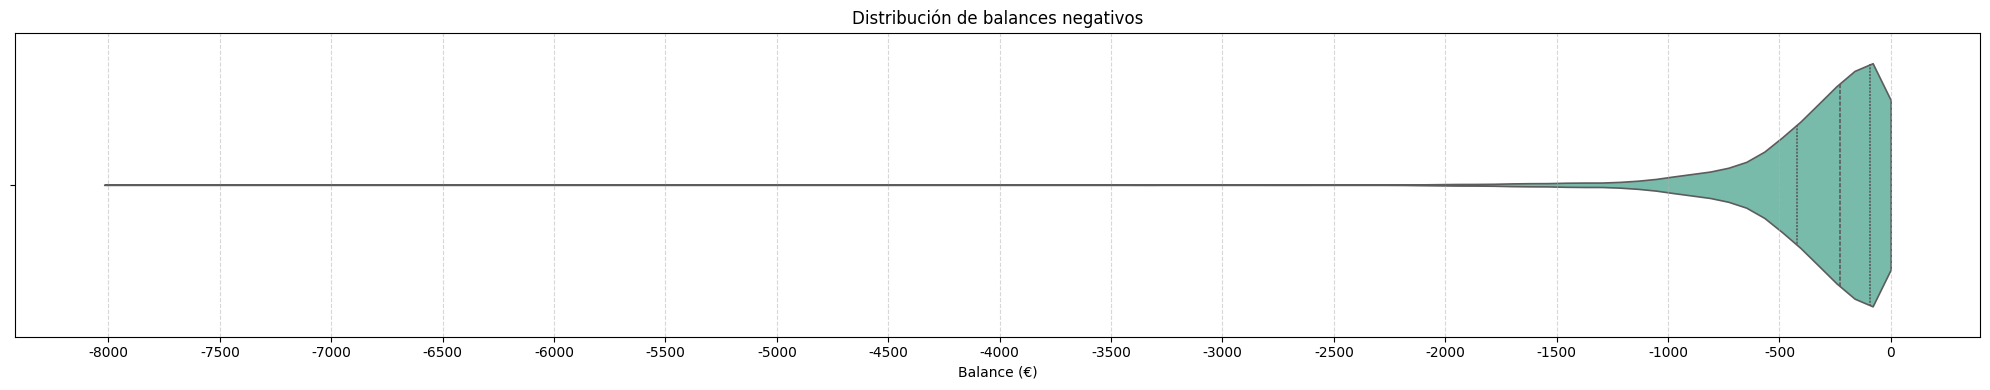

In [52]:
# Visualizamos con un gráfico la distribución de valores negativos para visualizar si los valores negativos se concentran cerca de cero o si hay muchos casos extremos muy negativos
plt.figure(figsize=(20, 4))

sns.violinplot(
    x=negativos['balance'],
    orient='h',
    inner='quartile',
    color='#6EC6B0',      # color más profesional (teal suave)
    linewidth=1.2,        # borde más definido
    cut=0
)

plt.title("Distribución de balances negativos")
plt.xlabel("Balance (€)")

# Crear ticks de 0 a -8000 cada 500
plt.xticks(
    ticks=range(0, -8500, -500), 
    labels=[str(t) for t in range(0, -8500, -500)]
)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

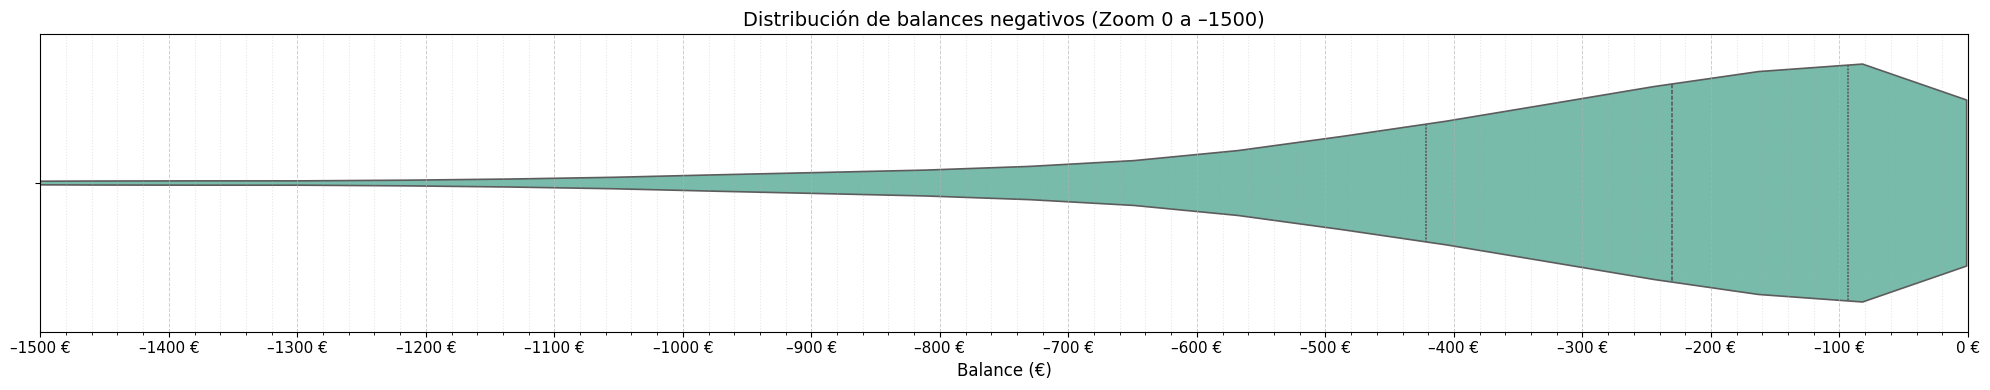

In [53]:
plt.figure(figsize=(20, 4))

sns.violinplot(
    x=negativos['balance'],
    orient='h',
    inner='quartile',
    color='#6EC6B0',      # color más profesional (teal suave)
    linewidth=1.2,        # borde más definido
    cut=0
)

plt.title("Distribución de balances negativos (Zoom 0 a –1500)", fontsize=14)
plt.xlabel("Balance (€)", fontsize=12)

# Crear ticks de 0 a -1500 cada 500 (zona donde está el 90% de los valores negativos)
ticks = range(0, -1600, -100)
labels = [f"{t} €" if t == 0 else f"–{abs(t)} €" for t in ticks]

plt.xticks(
    ticks=ticks,
    labels=labels,
    fontsize=11
)

# Activamos grid principal
plt.grid(axis='x', linestyle='--', alpha=0.6, linewidth=0.7)

# Activamos grid menor para más guía visual
plt.minorticks_on()
plt.grid(axis='x', which='minor', linestyle=':', alpha=0.3)

# Zoom en la parte donde se concentra el 90% de los valores negativos
plt.xlim(-1500, 0)

plt.tight_layout()
plt.show()


### ¿Conclusiones?

Los dos gráficos muestran que la mayoría de los clientes que están en negativo lo están por poco. La mayor concentración aparece cerca de 0 €, especialmente entre 0 y –300 €, lo que indica que la mayoría de los descubiertos son pequeños y probablemente temporales.

A medida que el balance se vuelve más negativo, la distribución se va estrechando, lo que refleja que cada vez hay menos clientes con deudas medias (entre –500 € y –1500 €). Son casos menos frecuentes y bastante dispersos.

En el gráfico completo se aprecia claramente que los valores extremadamente negativos existen pero son muy poco comunes. La enorme diferencia entre la concentración cercana a cero y la cola larga hacia –8000 € confirma que los descubiertos profundos son excepcionales y que el grupo principal de clientes en negativo tiene un perfil de riesgo mucho más moderado.

### 5.3. Calcular percentiles clave (P50, P75, P90 y P95)

In [54]:
# ==== Cálculo de percentiles clave ====
p50 = np.percentile(df['balance'], 50)
p75 = np.percentile(df['balance'], 75)
p90 = np.percentile(df['balance'], 90)
p95 = np.percentile(df['balance'], 95)

print("Percentil 50 (mediana):", p50)
print("Percentil 75:", p75)
print("Percentil 90:", p90)
print("Percentil 95:", p95)

Percentil 50 (mediana): 448.0
Percentil 75: 1428.0
Percentil 90: 3574.0
Percentil 95: 5768.0


Tras calcular los percentiles clave de la columna balance, observamos que el 50% de los clientes tiene 448 € o menos, lo que describe claramente al cliente promedio del banco. El percentil 75 se sitúa en torno a 1428 €, indicando que solo una cuarta parte del conjunto supera este nivel.

Los percentiles altos (P90 ≈ 3574 € y P95 ≈ 5768 €) confirman que los clientes con balances altos representan un porcentaje muy reducido.

En la banca real, no todos los clientes son iguales. El 10% de los clientes más ricos a menudo generan el 80% de los ingresos de un banco ("Principio de Pareto"), por lo que elegiremos utilizar el valor del percentil 90.

### 5.4. Representación gráfica mediante Histograma, KDE y Boxplot

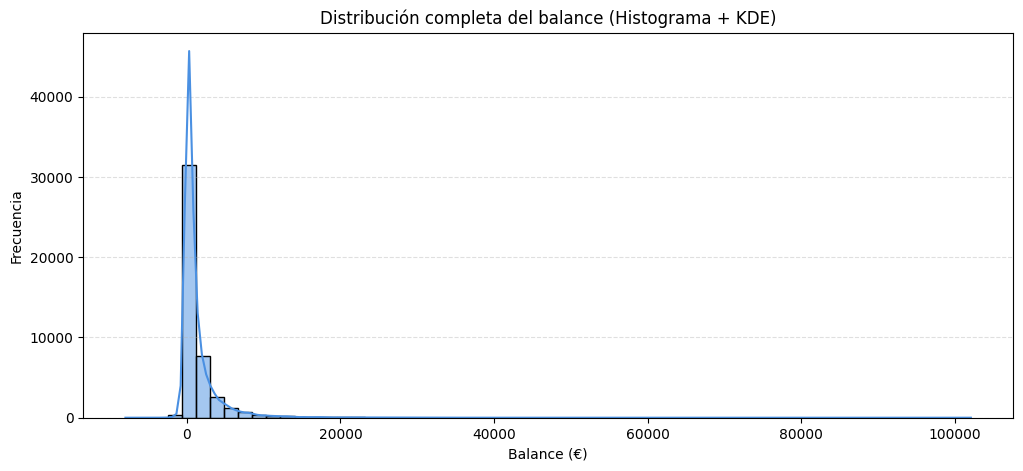

In [55]:
plt.figure(figsize=(12, 5))
sns.histplot(df['balance'], bins=60, kde=True, color='#4A90E2')
plt.title("Distribución completa del balance (Histograma + KDE)")
plt.xlabel("Balance (€)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

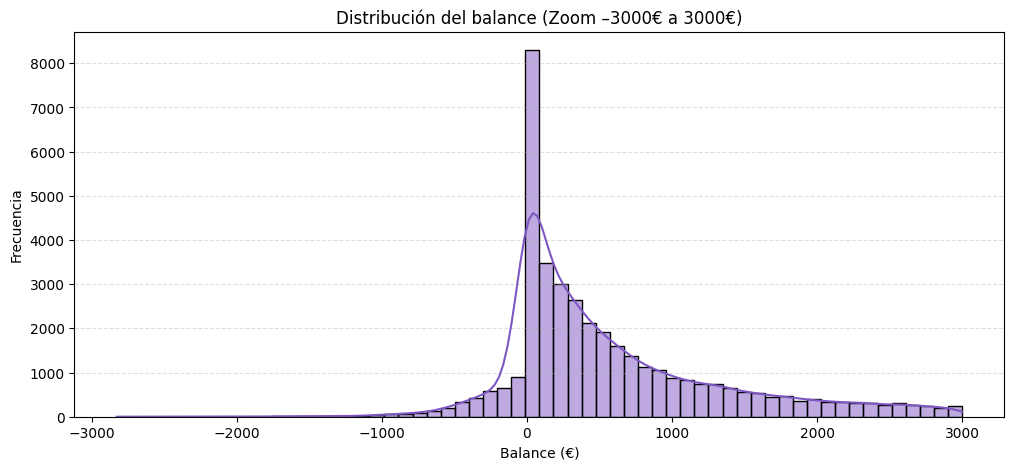

In [56]:
plt.figure(figsize=(12, 5))

sns.histplot(
    df[(df['balance'] >= -3000) & (df['balance'] <= 3000)]['balance'],
    bins=60,
    kde=True,
    color='#7E57C2'
)

plt.title("Distribución del balance (Zoom –3000€ a 3000€)")
plt.xlabel("Balance (€)")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


# **ESTA PARTE HAY QUE REVISAR LOS GRÁFICOS QUE NO ME CONVENCEN MUCHO**

### ¿Conclusiones?

FASFSASGFASGAG

---

## 6️⃣ **Creación de los dos escenarios (targets)**

En ambos casos se debe analizar qué proporción de clientes pertenece a cada grupo y si es necesario aplicar técnicas para tratar desbalances.

### 🔹 Escenario A: `Patrimonio_Alto`
##### 1. Crear la variable binaria según el umbral

In [57]:
# Crear la variable binaria 'Patrimonio_Alto'

# La variable podrá tener el valor 1 si el balance es mayor que el umbral, 0 si no lo es.
df["Patrimonio_Alto"] = (df["balance"] > p90).astype(int)

In [58]:
# Comprobar la creación de la nueva columna
print("Primeras filas con la nueva variable 'Patrimonio_Alto':")
print(df[['balance', 'Patrimonio_Alto']].head(10))

Primeras filas con la nueva variable 'Patrimonio_Alto':
   balance  Patrimonio_Alto
0     2143                0
1       29                0
2        2                0
3     1506                0
4        1                0
5      231                0
6      447                0
7        2                0
8      121                0
9      593                0


##### 2. Comprobar cuántos registros quedan en cada clase (balanceadas/desbalanceadas)

In [59]:
# Contar el número de registros en cada clase
conteo_clases = df['Patrimonio_Alto'].value_counts()
proporcion_clases = df['Patrimonio_Alto'].value_counts(normalize=True) * 100

print("\nResultados del Análisis de Desbalance de 'Patrimonio_Alto':")
print("---------------------------------------------------------")
print(f"Conteo de Clases:\n{conteo_clases}")
print("\nProporción de Clases:")
print(proporcion_clases.map('{:.2f}%'.format))


Resultados del Análisis de Desbalance de 'Patrimonio_Alto':
---------------------------------------------------------
Conteo de Clases:
Patrimonio_Alto
0    40690
1     4521
Name: count, dtype: int64

Proporción de Clases:
Patrimonio_Alto
0    90.00%
1    10.00%
Name: proportion, dtype: object


Gracias a esto observamos un dataset claramente desbalanceado, como era de esperar porque P90 define al 10% superior

### 🔹Escenario B: `Riesgo_Sobregiro`
- Aplicar el umbral cero  
- Crear la variable binaria correspondiente  
- Revisar la distribución resultante 

##### 1. Aplicar el umbral cero y crear la variable binaria según el umbral

In [60]:
# Definimos el umbral 0
umbral_cero = 0

# Creamos la variable binaria 'Riesgo_Sobregiro'
# 1 si el balance es menor que cero (riesgo/sobregiro), 0 si es cero o positivo.
df['Riesgo_Sobregiro'] = np.where(df['balance'] < umbral_cero, 1, 0)

# Comprobamos la creación de la nueva columna
print("Primeras filas con la nueva variable 'Riesgo_Sobregiro':")
print(df[['balance', 'Riesgo_Sobregiro']].head(10))

Primeras filas con la nueva variable 'Riesgo_Sobregiro':
   balance  Riesgo_Sobregiro
0     2143                 0
1       29                 0
2        2                 0
3     1506                 0
4        1                 0
5      231                 0
6      447                 0
7        2                 0
8      121                 0
9      593                 0


##### 2. Comprobar cuántos registros quedan en cada clase (balanceadas/desbalanceadas)

In [61]:
# Contar el número de registros en cada clase
conteo_clases_riesgo = df['Riesgo_Sobregiro'].value_counts()
proporcion_clases_riesgo = df['Riesgo_Sobregiro'].value_counts(normalize=True) * 100

print("\nResultados del Análisis de Desbalance de 'Riesgo_Sobregiro':")
print("----------------------------------------------------------")
print(f"Conteo de Clases:\n{conteo_clases_riesgo}")
print("\nProporción de Clases:")
print(proporcion_clases_riesgo.map('{:.2f}%'.format))


Resultados del Análisis de Desbalance de 'Riesgo_Sobregiro':
----------------------------------------------------------
Conteo de Clases:
Riesgo_Sobregiro
0    41445
1     3766
Name: count, dtype: int64

Proporción de Clases:
Riesgo_Sobregiro
0    91.67%
1     8.33%
Name: proportion, dtype: object


### ¿Conclusiones?

Al crear el escenario **Patrimonio_Alto**, observamos que únicamente el 10% de los clientes supera el umbral del percentil 90 del balance. Esto confirma que el grupo de clientes con un nivel económico claramente elevado es muy reducido en comparación con el resto de la base. La distribución está fuertemente desbalanceada, lo que significa que cualquier modelo que utilice esta variable necesitará tener en cuenta este desequilibrio para no favorecer en exceso a la clase mayoritaria.

En el escenario **Riesgo_Sobregiro**, los resultados muestran que aproximadamente el 8.33% de los clientes tiene saldo negativo, mientras que el 91.67% mantiene un balance igual o superior a cero. Aunque este escenario también presenta desbalance, la diferencia entre clases es ligeramente menor que en el caso del patrimonio alto. Aun así, sigue siendo importante considerar técnicas de balanceo si se desea entrenar modelos de clasificación consistentes.

En conjunto, ambos escenarios revelan una estructura muy desigual en los extremos financieros de la cartera: solo una minoría acumula altos niveles de patrimonio y una minoría diferente incurre en sobregiro. Esto ofrece oportunidades interesantes para el modelado, pero también exige atención especial a la desproporción entre clases que podría afectar a futuros algoritmos de machine learning.

---

## 7️⃣ **Análisis univariante y bivariante**
En este apartado se exploran relaciones relevantes:
- Distribuciones individuales de variables categóricas y numéricas  
- Relación entre variables demográficas (age, job, education…) y `balance`  
- Relación entre variables y cada target (`Patrimonio_Alto` o `Riesgo_Sobregiro`)  
- Visualizaciones: countplots, barplots, boxplots, heatmaps de correlación  

El objetivo es descubrir patrones que puedan ser útiles para los modelos predictivos.

---

## 8️⃣ **Preprocesamiento para Machine Learning**
Aquí se preparan los datos antes de entrenar modelos:
- Identificar variables categóricas y numéricas  
- Crear transformadores:  
  - `OneHotEncoder` para categorías  
  - `StandardScaler` para variables numéricas  
- Separar en train/test  

#### 1. Separar datos en X e Y

In [62]:
X = df.drop(columns=['Patrimonio_Alto', 'Riesgo_Sobregiro', 'balance'])

# Variable objetivo para el escenario A
y_escenario_A = df['Patrimonio_Alto']

# Variable objetivo para el escenario B
y_escenario_B = df['Riesgo_Sobregiro']

#### 2. Identificar variables categóricas y numéricas

In [63]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

print("Numéricas:", list(num_features))
print("Categóricas:", list(cat_features))

Numéricas: ['age', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed_term_deposit']


#### 2. Crear transformadores

Para las categóricas usaremos OneHotEncoder y para las numéricas StandardScaler

In [64]:
# Categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Numéricas
numeric_transformer = StandardScaler()

#### 3. Crear el ColumnTransformer

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

#### 5. Dividir en train/test

##### 🟩 Escenario A — Patrimonio_Alto

In [66]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X,
    y_escenario_A,
    test_size=0.2,
    random_state=42,
    stratify=y_escenario_A
)

##### 🟥 Escenario B — Riesgo_Sobregiro

In [67]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X,
    y_escenario_B,
    test_size=0.2,
    random_state=42,
    stratify=y_escenario_B
)

#### 6. Aplicar el preprocesamiento

Esta parte la he dejado sin nada porque quizá lo mejor es crear dos notebooks?

In [68]:
# ===== Aplicar el preprocesamiento para el Escenario A =====

# Ajustar el preprocesador solo con los datos de entrenamiento
X_train_A_preprocessed = preprocessor.fit_transform(X_train_A)

# Transformar los datos de test con el mismo ajuste
X_test_A_preprocessed = preprocessor.transform(X_test_A)


# ===== Aplicar el preprocesamiento para el Escenario B =====

# Ajustar el preprocesador solo con los datos de entrenamiento
X_train_B_preprocessed = preprocessor.fit_transform(X_train_B)

# Transformar los datos de test con el mismo ajuste
X_test_B_preprocessed = preprocessor.transform(X_test_B)

---

## 9️⃣ **Entrenamiento de modelos de clasificación**
Para cada escenario (A y/o B), se entrenan modelos como:
- Regresión Logística  
- Árbol de Decisión  
- Random Forest  
- KNN  
- Naive Bayes  
- SVM  
- MLP (Red Neuronal sencilla)

El enfoque es comparativo: ver cuál funciona mejor según las métricas.

## Escenario A

### Regresión logística

In [69]:
rl = LogisticRegression(random_state=42, max_iter=1500)

rl.fit(X_train_A_preprocessed, y_train_A)

# Realiza predicciones
y_pred_lr = rl.predict(X_test_A_preprocessed)

# Calcula la matriz de confusión
cm_lr = confusion_matrix(y_test_A, y_pred_lr)

### Árbol de decisión optimizado

In [70]:
tree_optimizado = DecisionTreeClassifier(random_state=42)

# Definir el diccionario de parámetros a probar
param_grid = {
    'max_depth': [None, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'sqrt', 'log2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=tree_optimizado,
    param_grid=param_grid,
    cv=5,  # validación cruzada con 5 particiones
    scoring='f1',
    n_jobs=-1  # usa todos los núcleos disponibles para acelerar
)

# Entrenar el GridSearchCV
grid_search.fit(X_train_A_preprocessed, y_train_A)

# Obtener el mejor modelo
best_model_dt = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_dt_opt = best_model_dt.predict(X_test_A_preprocessed)

cm_dt_opt = confusion_matrix(y_test_A, y_pred_dt_opt)

### Random Forest

In [71]:
random_tree = RandomForestClassifier(random_state=42)

random_tree.fit(X_train_A_preprocessed, y_train_A)

y_pred_rf = random_tree.predict(X_test_A_preprocessed)

cm_dt = confusion_matrix(y_test_A, y_pred_rf)

### Random Forest Optimizado

In [72]:
random_tree_opt = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2']
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=random_tree_opt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
grid_search.fit(X_train_A_preprocessed, y_train_A)

# Extraer mejor modelo
best_model_rf = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_rf_opt = best_model_rf.predict(X_test_A_preprocessed)

cm_rf_opt = confusion_matrix(y_test_A, y_pred_rf_opt)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


### KNN

In [73]:
knn = KNeighborsClassifier()

knn.fit(X_train_A_preprocessed, y_train_A)

y_pred_knn = knn.predict(X_test_A_preprocessed)

cm_knn = confusion_matrix(y_test_A, y_pred_knn)

### KNN Optimizado

In [74]:
knn_opt = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=knn_opt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
grid_search.fit(X_train_A_preprocessed, y_train_A)
print(grid_search.best_params_)

# Extraer mejor modelo
best_model_knn = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_knn_opt = best_model_knn.predict(X_test_A_preprocessed)

cm_knn_opt = confusion_matrix(y_test_A, y_pred_knn_opt)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


### Naive Bayes

In [75]:
nb = GaussianNB()

nb.fit(X_train_A_preprocessed, y_train_A)

y_pred_nb = nb.predict(X_test_A_preprocessed)

cm_nb = confusion_matrix(y_test_A, y_pred_nb)

### Naive Bayes Optimizado

In [76]:
nb_opt = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}
# Crear Grid Search
grid_search = GridSearchCV(
    estimator=nb_opt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
grid_search.fit(X_train_A_preprocessed, y_train_A)
print(grid_search.best_params_)

# Extraer mejor modelo
best_model_nb = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred_nb_opt = best_model_nb.predict(X_test_A_preprocessed)

cm_nb_opt = confusion_matrix(y_test_A, y_pred_nb_opt)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'var_smoothing': 0.0001}


### Support Vector Machines

In [77]:
svc = SVC()

svc.fit(X_train_A_preprocessed, y_train_A)

y_pred_svc = svc.predict(X_test_A_preprocessed)

cm_svc = confusion_matrix(y_test_A, y_pred_svc)

### Support Vector Machines Optimizado

In [ ]:
svc_opt = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Crear Grid Search
grid_search = GridSearchCV(
    estimator=svc_opt,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# Ajustar modelo
grid_search.fit(X_train_A_preprocessed, y_train_A)

# Extraer mejor modelo
best_model_svc = grid_search.best_estimator_
print(grid_search.best_params_)

# Predecir en el conjunto de prueba
y_pred_svc_opt = best_model_svc.predict(X_test_A_preprocessed)

cm_svc_opt = confusion_matrix(y_test_A, y_pred_svc_opt)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


---

## 🔟 **Evaluación de modelos**
Se analizan:
- Accuracy  
- F1-score  
- Matriz de confusión  
- Clasification report  

El objetivo es seleccionar el modelo más robusto según el caso de uso (segmentación de clientes o gestión de riesgo).


---

## 1️⃣1️⃣ **Conclusiones**
La última sección resume:
- Principales hallazgos del EDA  
- Interpretación financiera de los resultados  
- Mejor modelo encontrado y por qué  
- Limitaciones del dataset  
- Posibles mejoras o líneas futuras  